## Resampling 

1) Involves changing the frequency of your time series observations.

2) Two types of resampling are:

Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.

Downsampling: Where you decrease the frequency of the samples, such as from days to months.

For example, you may have daily data and want to predict a monthly problem. You could use the daily data directly or you could downsample it to monthly data and develop your model.

##### Something to keep in mind is that Dan applies much more force with his left arm than his right (due to an old injury I think) which is clearly visible in the double poling data.

## Smoothing

#### https://www.displayr.com/smoothing-time-series-data/

The aim of smoothing is to remove “irregular” noise and cyclical components of the time series. It aims to provide a more accurate prediction of the long term trend. If long term trend is what you want to forecast, then smoothing techniques are generally quite helpful.

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.


In [1]:
# import statements

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import Series

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, BatchNormalization

from sklearn.model_selection import train_test_split
from random import shuffle

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

from keras import regularizers

/Users/nickeylawrence/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read the Gear2 data
Gear2Files = ['./Gear2/segment2.csv', './Gear2/segment3.csv','./Gear2/segment4.csv',
              './Gear2/segment5.csv','./Gear2/segment6.csv']

X_Gear2=[0] * len(Gear2Files)
Y_Gear2=[0] * len(Gear2Files)
for index,file in enumerate(Gear2Files):
    X_Gear2[index] = pd.read_csv(file);
    Y_Gear2[index] = pd.DataFrame(data= np.full((X_Gear2[index].shape[0],1), 2));
    X_Gear2[index] = X_Gear2[index].assign(Gear=Y_Gear2[index].values);

# Read the Gear3 data
Gear3Files = ['./Gear3/segment1.csv', './Gear3/segment2.csv','./Gear3/segment3.csv',
              './Gear3/segment4.csv','./Gear3/segment5.csv', './Gear3/segment6.csv']

X_Gear3=[0] * len(Gear3Files)
Y_Gear3=[0] * len(Gear3Files)
for index,file in enumerate(Gear3Files):
    X_Gear3[index] = pd.read_csv(file);
    Y_Gear3[index] = pd.DataFrame(data= np.full((X_Gear3[index].shape[0],1), 3));
    X_Gear3[index] = X_Gear3[index].assign(Gear=Y_Gear3[index].values);

# Read the Gear4 data
Gear4Files = ['./Gear4/segment2.csv','./Gear4/segment3.csv','./Gear4/segment4.csv',
              './Gear4/segment5.csv', './Gear4/segment6a.csv','./Gear4/segment6b.csv']

X_Gear4=[0] * len(Gear4Files)
Y_Gear4=[0] * len(Gear4Files)
for index,file in enumerate(Gear4Files):
    X_Gear4[index] = pd.read_csv(file);
    Y_Gear4[index] = pd.DataFrame(data= np.full((X_Gear4[index].shape[0],1), 4));
    X_Gear4[index] = X_Gear4[index].assign(Gear=Y_Gear4[index].values);

# Read the Gear 5 data
Gear5Files = ['./Double/segment1.csv','./Double/segment2.csv','./Double/segment3.csv',
              './Double/segment4.csv', './Double/segment5.csv','./Double/segment7.csv']

X_Gear5=[0] * len(Gear5Files)
Y_Gear5=[0] * len(Gear5Files)
for index,file in enumerate(Gear5Files):
    X_Gear5[index] = pd.read_csv(file);
    Y_Gear5[index] = pd.DataFrame(data= np.full((X_Gear5[index].shape[0],1), 5));
    X_Gear5[index] = X_Gear5[index].assign(Gear=Y_Gear5[index].values);

In [3]:
# Implement moving average for a window size of 3, and split the segments such that each has 750 time-steps

limit = 750
features = list(X_Gear2[0].columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

XGear=[]
for index in range(len(X_Gear2)):
    dataG2 = X_Gear2[index];
    x = dataG2[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear2[index][scaledFeatures] = rolling_mean;
    dataG2 = X_Gear2[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG2)/limit);
    XGear += [dataG2[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear3)):
    dataG3 = X_Gear3[index];
    x = dataG3[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear3[index][scaledFeatures] = rolling_mean;
    dataG3 = X_Gear3[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG3)/limit);
    XGear += [dataG3[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear4)):
    dataG4 = X_Gear4[index];
    x = dataG4[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear4[index][scaledFeatures] = rolling_mean;
    dataG4 = X_Gear4[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG4)/limit);
    XGear += [dataG4[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
for index in range(len(X_Gear5)):
    dataG5 = X_Gear5[index];
    x = dataG5[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear5[index][scaledFeatures] = rolling_mean;
    dataG5 = X_Gear5[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG5)/limit);
    XGear += [dataG5[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
print(XGear)

[         t          fL        thL       w1L       w2L       w3L       a1L  \
2     0.04    0.133333  51.800000  0.201333  0.234000 -0.023000  3.156667   
3     0.06    0.166667  51.966667  0.198000  0.212333 -0.050000  3.296667   
4     0.08    0.166667  52.100000  0.171333  0.221667 -0.070667  3.226667   
5     0.10    0.200000  52.166667  0.130333  0.215000 -0.091000  3.030000   
6     0.12    0.200000  52.233333  0.083000  0.165333 -0.117000  2.786667   
7     0.14    0.200000  52.233333  0.024667  0.120333 -0.150333  2.646667   
8     0.16    0.200000  52.133333 -0.049333  0.087000 -0.185000  2.660000   
9     0.18    0.200000  51.900000 -0.139000  0.030000 -0.219667  2.873333   
10    0.20    0.200000  51.566667 -0.229000 -0.044333 -0.241667  3.260000   
11    0.22    0.166667  51.166667 -0.318000 -0.086333 -0.251667  3.596667   
12    0.24    0.166667  50.666667 -0.399667 -0.093667 -0.252000  3.626667   
13    0.26    0.166667  50.066667 -0.464333 -0.164667 -0.248667  3.366667  

In [4]:
# Sample data after rolling

# features = list(X_Gear2[0].columns);
# scaledFeatures = [item for item in features if item not in ['t','Gear']]

# X2_Gear2_New = pd.DataFrame(X_Gear2[0][scaledFeatures])

# rolling = X2_Gear2_New.rolling(window=3)
# rolling_mean = rolling.mean()

# X2_Gear2_New['fL'].plot()
# rolling_mean['fL'].plot(color='yellow')
# plt.show()

In [5]:
X = XGear[:] # Copy words
shuffle(X) 

In [6]:
X = pd.concat(X);

In [7]:
data = pd.DataFrame(X);

data.reset_index(inplace = True, drop = True)
for i in range(len(data)):
    data.loc[i,'t'] = i*0.02

In [8]:
# Normalisation
# Feature normalization
# Normalize Time Series Data
# Source : https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

# Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
# useful when your time series data has input values with differing scales.
features = list(data.columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

for i in range(len(scaledFeatures)):
    feature = scaledFeatures[i];
    print('Scaling feature : ', scaledFeatures[i])
    values = X[feature].values.reshape(-1,1);
    values = values.astype('float32');
    scaler = MinMaxScaler(feature_range = (0,1));
    scaled_f = scaler.fit_transform(values);
    X[feature] = scaled_f;

Scaling feature :  fL
Scaling feature :  thL
Scaling feature :  w1L
Scaling feature :  w2L
Scaling feature :  w3L
Scaling feature :  a1L
Scaling feature :  a2L
Scaling feature :  a3L
Scaling feature :  fR
Scaling feature :  thR
Scaling feature :  w1R
Scaling feature :  w2R
Scaling feature :  w3R
Scaling feature :  a1R
Scaling feature :  a2R
Scaling feature :  a3R
Scaling feature :  x
Scaling feature :  y
Scaling feature :  v
Scaling feature :  vdir


In [9]:
# Create one-hot Y vectors
features.remove('Gear')
features.remove('x')
features.remove('y')
features.remove('v')
X = data[features]
Y = data['Gear']
# Create one-hot Y vectors
Y_onehot = pd.get_dummies(Y).values;

In [10]:
X = np.array(X)
Y = np.array(Y_onehot)

In [11]:
timesteps = 1
XNew = X.reshape(X.shape[0],timesteps,18)
YNew = Y.reshape(Y.shape[0],timesteps,4)

trainX, testX, trainY, testY = train_test_split(XNew, YNew, test_size=0.2);

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2);

In [12]:
# design and fit our LSTM network
l1 = 1e-2;
l2 = 0.00;
hidden_dim = 64;
epochs = 25;
batch_size = 100;

model = Sequential();
model.add(LSTM(hidden_dim, 
               kernel_regularizer = regularizers.l1_l2(l1=l1, l2=l2), 
               return_sequences = True, 
               input_shape = (timesteps, 17)));
model.add(Dense(4, activation = 'softmax'));
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(trainX[:,:,1:], trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX[:,:,1:],valY))


Train on 16578 samples, validate on 4145 samples
Epoch 1/200
16578/16578 [==============================] - 7s 393us/step - loss: 1.3295 - categorical_accuracy: 0.3666 - val_loss: 1.2536 - val_categorical_accuracy: 0.4507
Epoch 2/200
16578/16578 [==============================] - 5s 310us/step - loss: 1.1664 - categorical_accuracy: 0.4781 - val_loss: 1.1303 - val_categorical_accuracy: 0.4883
Epoch 3/200
16578/16578 [==============================] - 4s 269us/step - loss: 1.1052 - categorical_accuracy: 0.4963 - val_loss: 1.1028 - val_categorical_accuracy: 0.5054
Epoch 4/200
16578/16578 [==============================] - 5s 277us/step - loss: 1.0822 - categorical_accuracy: 0.5043 - val_loss: 1.0828 - val_categorical_accuracy: 0.5006
Epoch 5/200
16578/16578 [==============================] - 5s 301us/step - loss: 1.0649 - categorical_accuracy: 0.5115 - val_loss: 1.0715 - val_categorical_accuracy: 0.5037
Epoch 6/200
16578/16578 [==============================] - 5s 272us/step - loss: 1.052

Epoch 47/200
16578/16578 [==============================] - 4s 244us/step - loss: 0.7231 - categorical_accuracy: 0.7062 - val_loss: 0.7334 - val_categorical_accuracy: 0.7163
Epoch 48/200
16578/16578 [==============================] - 4s 247us/step - loss: 0.7183 - categorical_accuracy: 0.7106 - val_loss: 0.7304 - val_categorical_accuracy: 0.6984
Epoch 49/200
16578/16578 [==============================] - 4s 240us/step - loss: 0.7129 - categorical_accuracy: 0.7144 - val_loss: 0.7223 - val_categorical_accuracy: 0.7117
Epoch 50/200
16578/16578 [==============================] - 4s 254us/step - loss: 0.7091 - categorical_accuracy: 0.7132 - val_loss: 0.7179 - val_categorical_accuracy: 0.7151
Epoch 51/200
16578/16578 [==============================] - 4s 254us/step - loss: 0.7059 - categorical_accuracy: 0.7164 - val_loss: 0.7111 - val_categorical_accuracy: 0.7158
Epoch 52/200
16578/16578 [==============================] - 4s 247us/step - loss: 0.7023 - categorical_accuracy: 0.7183 - val_loss

16578/16578 [==============================] - 4s 248us/step - loss: 0.5678 - categorical_accuracy: 0.7817 - val_loss: 0.5752 - val_categorical_accuracy: 0.7771
Epoch 95/200
16578/16578 [==============================] - 4s 247us/step - loss: 0.5663 - categorical_accuracy: 0.7809 - val_loss: 0.5774 - val_categorical_accuracy: 0.7737
Epoch 96/200
16578/16578 [==============================] - 4s 248us/step - loss: 0.5626 - categorical_accuracy: 0.7830 - val_loss: 0.5734 - val_categorical_accuracy: 0.7742
Epoch 97/200
16578/16578 [==============================] - 4s 241us/step - loss: 0.5615 - categorical_accuracy: 0.7828 - val_loss: 0.5704 - val_categorical_accuracy: 0.7812
Epoch 98/200
16578/16578 [==============================] - 4s 253us/step - loss: 0.5594 - categorical_accuracy: 0.7866 - val_loss: 0.5729 - val_categorical_accuracy: 0.7686
Epoch 99/200
16578/16578 [==============================] - 4s 245us/step - loss: 0.5561 - categorical_accuracy: 0.7850 - val_loss: 0.5659 - va

16578/16578 [==============================] - 6s 369us/step - loss: 0.4810 - categorical_accuracy: 0.8197 - val_loss: 0.4903 - val_categorical_accuracy: 0.8152
Epoch 141/200
16578/16578 [==============================] - 6s 342us/step - loss: 0.4777 - categorical_accuracy: 0.8221 - val_loss: 0.4918 - val_categorical_accuracy: 0.8164
Epoch 142/200
16578/16578 [==============================] - 5s 298us/step - loss: 0.4763 - categorical_accuracy: 0.8238 - val_loss: 0.4903 - val_categorical_accuracy: 0.8145
Epoch 143/200
16578/16578 [==============================] - 5s 281us/step - loss: 0.4731 - categorical_accuracy: 0.8263 - val_loss: 0.4922 - val_categorical_accuracy: 0.8138
Epoch 144/200
16578/16578 [==============================] - 5s 287us/step - loss: 0.4754 - categorical_accuracy: 0.8227 - val_loss: 0.4837 - val_categorical_accuracy: 0.8154
Epoch 145/200
16578/16578 [==============================] - 5s 293us/step - loss: 0.4705 - categorical_accuracy: 0.8242 - val_loss: 0.4827

Epoch 187/200
16578/16578 [==============================] - 4s 252us/step - loss: 0.4183 - categorical_accuracy: 0.8473 - val_loss: 0.4478 - val_categorical_accuracy: 0.8179
Epoch 188/200
16578/16578 [==============================] - 4s 263us/step - loss: 0.4188 - categorical_accuracy: 0.8465 - val_loss: 0.4355 - val_categorical_accuracy: 0.8261
Epoch 189/200
16578/16578 [==============================] - 4s 254us/step - loss: 0.4143 - categorical_accuracy: 0.8487 - val_loss: 0.4381 - val_categorical_accuracy: 0.8287
Epoch 190/200
16578/16578 [==============================] - 4s 243us/step - loss: 0.4146 - categorical_accuracy: 0.8475 - val_loss: 0.4318 - val_categorical_accuracy: 0.8292
Epoch 191/200
16578/16578 [==============================] - 4s 250us/step - loss: 0.4127 - categorical_accuracy: 0.8475 - val_loss: 0.4341 - val_categorical_accuracy: 0.8258
Epoch 192/200
16578/16578 [==============================] - 4s 241us/step - loss: 0.4127 - categorical_accuracy: 0.8458 - va

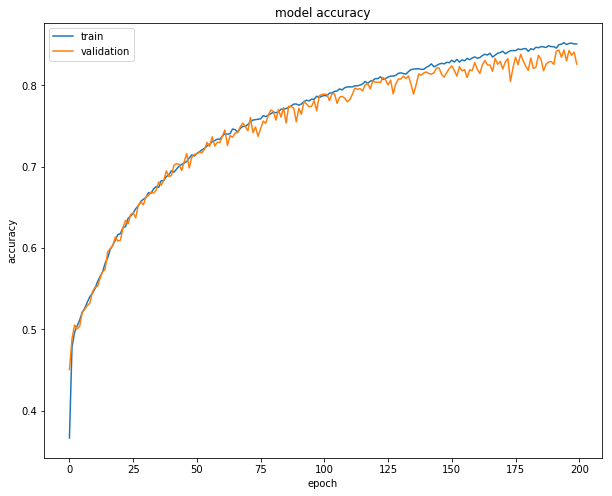

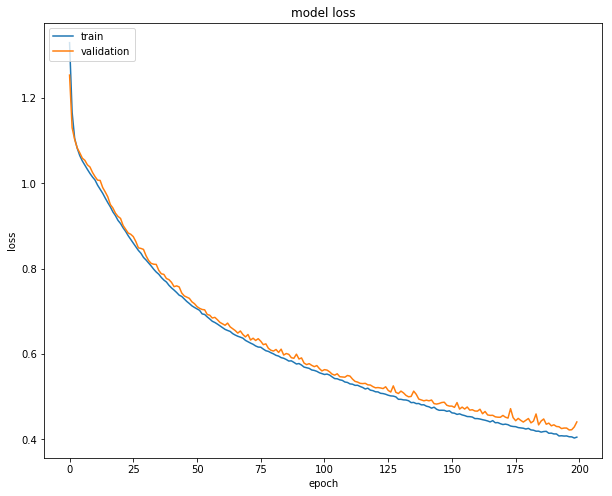

In [13]:
# summarize history for accuracy
plt.figure(0,figsize=(10, 8))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(0,figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
# Evaluate
predictions = model.predict_classes(testX[:,:,1:])

In [15]:
scores = model.evaluate(testX[:,:,1:], testY, verbose=2)
print(scores)

[0.4213777118795881, 0.8428874733571816]


In [16]:
timeTest = np.array(testX[:,:,0])
forceLeftTest = np.array(testX[:,:,1])
forceRightTest = np.array(testX[:,:,9])
predTest = np.array(predictions+2)
realTest = np.array(np.argmax(testY, axis=2)+2)
result = np.concatenate((timeTest,forceLeftTest, forceRightTest, predTest, realTest), axis=1)

In [17]:
ind=np.argsort(result[:,0])
result2 = result[ind]

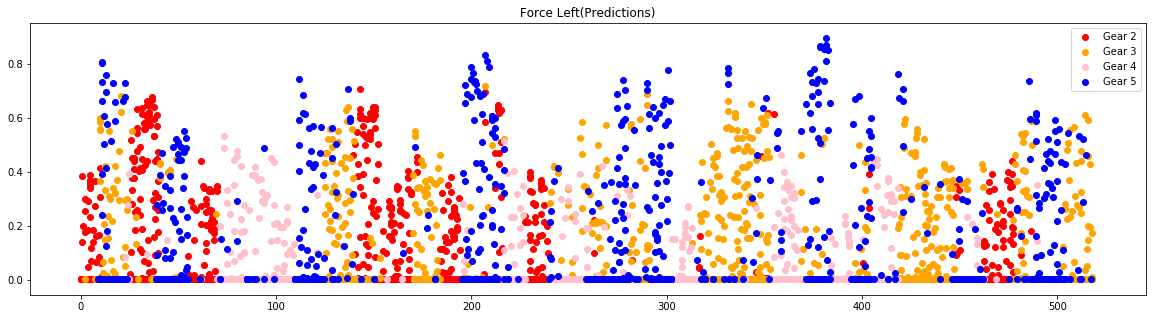

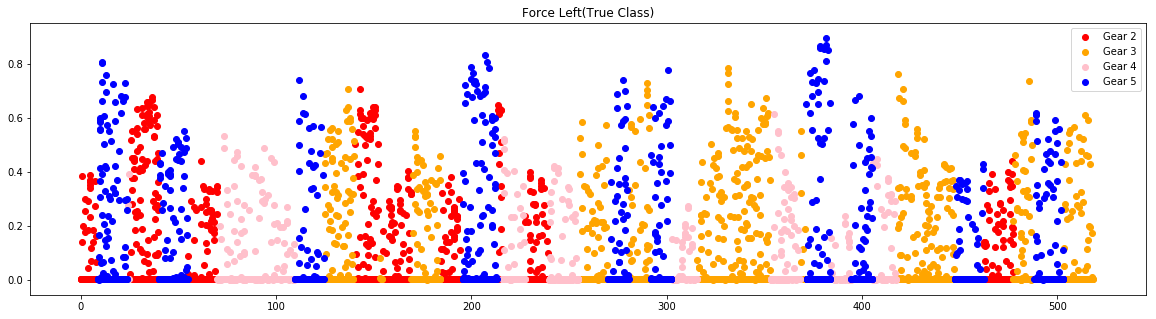

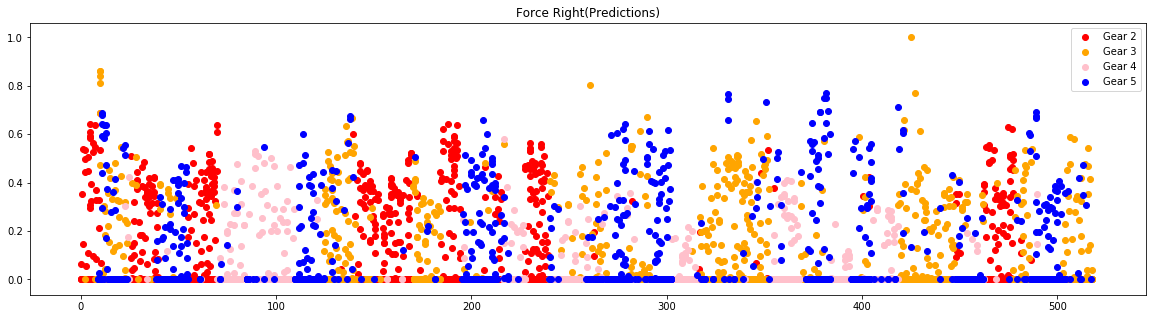

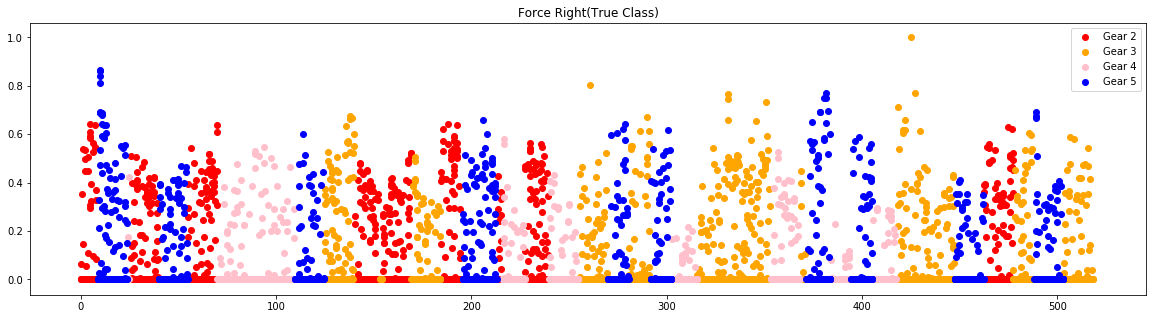

In [18]:
plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Left(Predictions)')
for i in range(2,6):
    classResult = result[result[:,3]==i]
    plt.scatter(classResult[:,0],classResult[:,1],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Left(True Class)')
for i in range(2,6):
    classRealResult = result[result[:,4]==i]
    plt.scatter(classRealResult[:,0],classRealResult[:,1],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
plt.title('Force Right(Predictions)')
for i in range(2,6):
    classResult = result[result[:,3]==i]
    plt.scatter(classResult[:,0],classResult[:,2],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Right(True Class)')
for i in range(2,6):
    classRealResult = result[result[:,4]==i]
    plt.scatter(classRealResult[:,0],classRealResult[:,2],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()


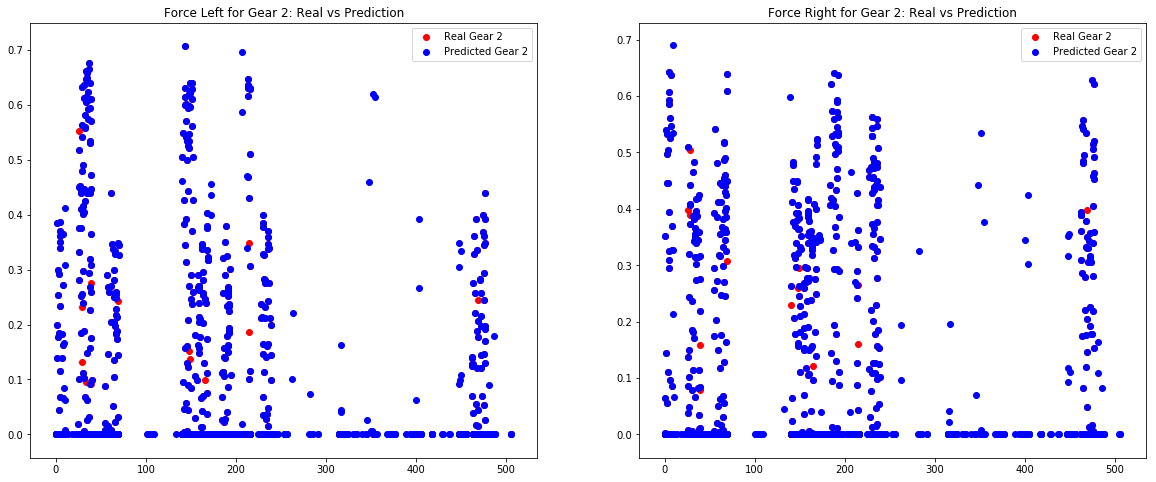

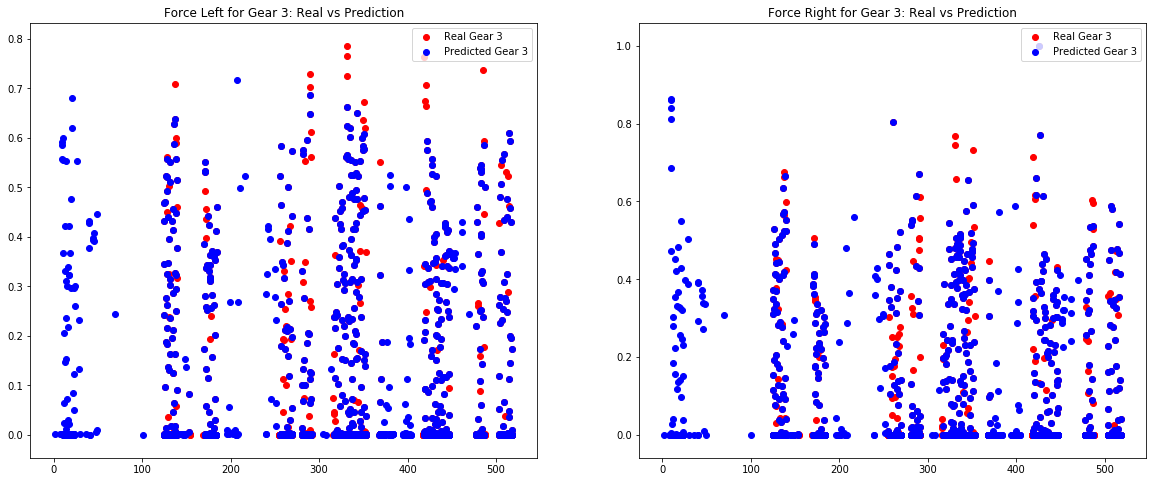

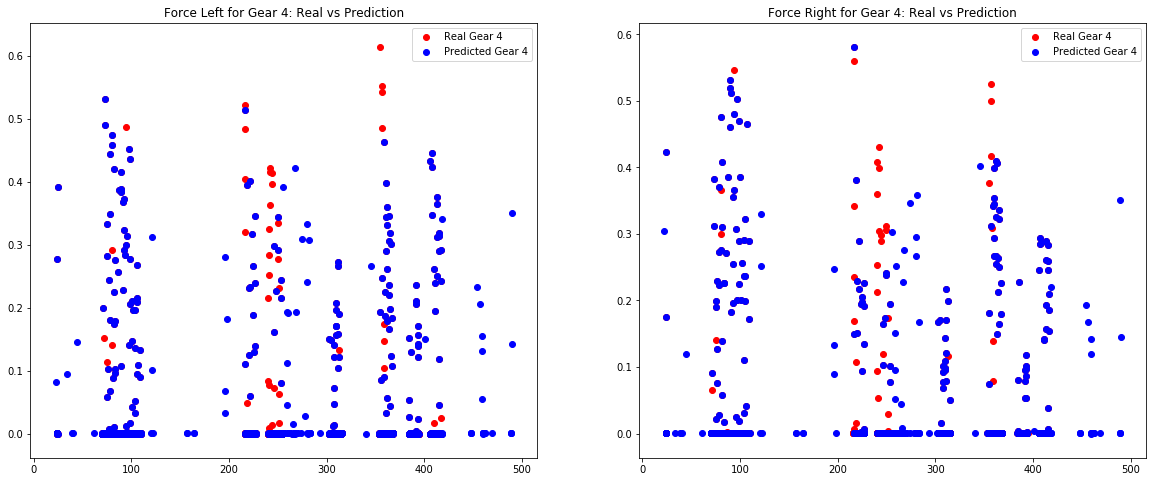

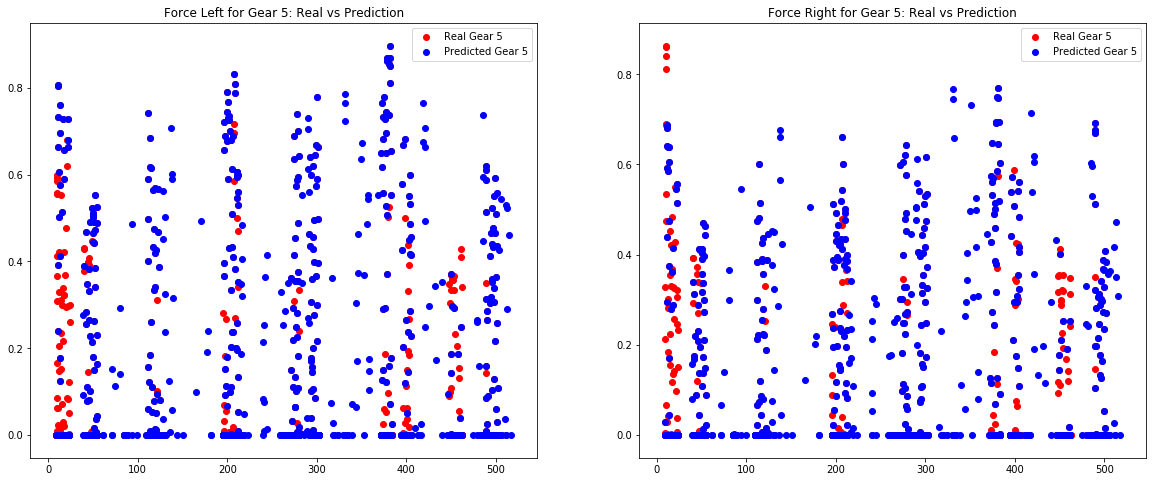

In [19]:
for i in range(2,6):
    classPredResult = result[result[:,3]==i]
    classRealResult = result[result[:,4]==i]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
    
    ax1.set_title('Force Left for Gear '+str(i) +': Real vs Prediction') 
    ax1.scatter(classRealResult[:,0],classRealResult[:,1],c ='red',label='Real Gear ' + str(i))
    ax1.scatter(classPredResult[:,0],classPredResult[:,1],c ='blue',label='Predicted Gear ' + str(i))
    ax1.legend(loc="upper right")
    
    ax2.set_title('Force Right for Gear '+str(i) +': Real vs Prediction') 
    ax2.scatter(classRealResult[:,0],classRealResult[:,2],c ='red',label='Real Gear ' + str(i))
    ax2.scatter(classPredResult[:,0],classPredResult[:,2],c ='blue',label='Predicted Gear ' + str(i))
    ax2.legend(loc="upper right")
plt.show()    

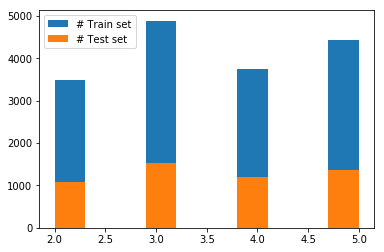

In [20]:
# Count of data for each gear in training set
i = (np.argmax(trainY, axis = 2)) + 2

# Count of data for each gear in test set
j = (np.argmax(testY, axis = 2)) + 2

plt.hist(i, label = '# Train set')
plt.hist(j, label = '# Test set')
plt.legend()
plt.show()